# Old

## The curse of dimensionality

In this context we quickly should discuss the curse of dimensionality and its impact on measuring similarities between numerical representations of documents. In general, the volume of numerical spaces rises quickly if its dimension increases. A side-effect of this increase is that observations tend be drawn away from each other and the data becomes more sparse. If data is sparse, it becomes more challenging to identify similarities and dissimilarities between observations. Identifying such similarities and dissimilarities are in the center of supervised and unsupervised machine learning algorithms, such as clustering, regression or classification tasks. 

However, the exact impact for increasing dimensionality depends on the numerical space and the task itself. Let us take a look at some examples to get some intuition thouth. First, let us understand what it means the numerical space quickly increases. Assume, we identify the state of an observation by binary $x_i \in \lbrace 0, 1 \rbrace \forall x_i$ variables. If we use one variable $x_1$ (one dimension), the number of possible states is $2$, i.e., $(0), (1)$, if we use two variables (two dimensions), the number of possible states is $4$, i.e., 

$$
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix}, 
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix},
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
$$

if we use three variables (three dimensions), the number of possible states is $8$ and in general for $d$ dimensions, the number of possible states is $2^d$. The graph below illustrates that in this scenario the volume of the numerical space even increases exponentially for incrasing dimensions.

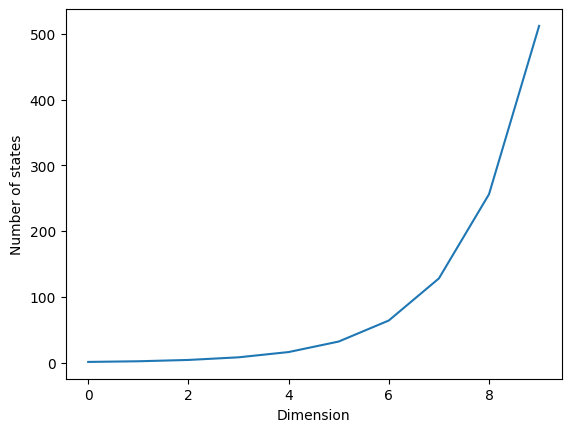

In [1]:
import matplotlib.pylab as plt

x = list(range(10))
y = [2**i for i in x]
plt.plot(x, y)
plt.xlabel("Dimension")
plt.ylabel("Number of states")
plt.show()

To get a intuition for observations being drawn apart in higher dimensions and how this depends on the numerical space and the measure which is used for quantifying the distance between observations, let us take a look at some simulation experiments. The first assumes each observation is in the interval $x_i \in [0, 1] \forall x_i$. For a given dimension each vector $\boldsymbol{x}^T = \begin{pmatrix} x_{i1} & ... & x_{id} \end{pmatrix} $ is located in the the vector space $[0, 1]^d$. We randomly draw $n$ observations in the vector space with uniform probabilities (each position is equally likely) and (1) calculate the average of all pairwise euclidean and cosine distances. For instance, the next two cells exhibit this for $n = 500$ and $d = 2, 3$.

The average euclidean distance is: 0.5319
The average cosine distance is: 0.1706


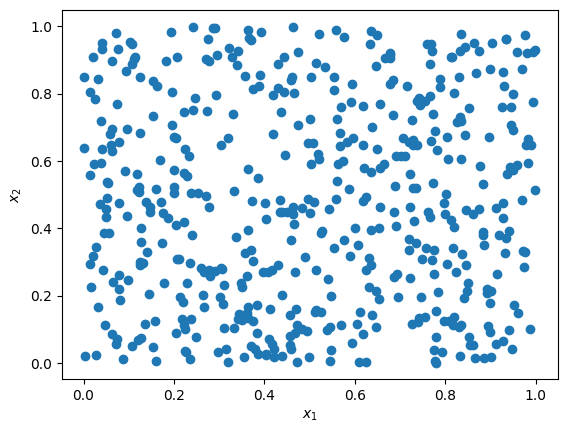

In [2]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

n = 500
U = np.random.rand(n, 2)
plt.scatter(U[:, 0], U[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
euc_dist = euclidean_distances(U)
cos_dist = cosine_distances(U)
euc_dist_flatten = euc_dist[np.tril_indices(n, k = -1)]
cos_dist_flatten = cos_dist[np.tril_indices(n, k = -1)]
print(f"The average euclidean distance is: {np.mean(euc_dist_flatten):.4f}")
print(f"The average cosine distance is: {np.mean(cos_dist_flatten):.4f}")

The average euclidean distance is: 0.6610
The average cosine distance is: 0.2069


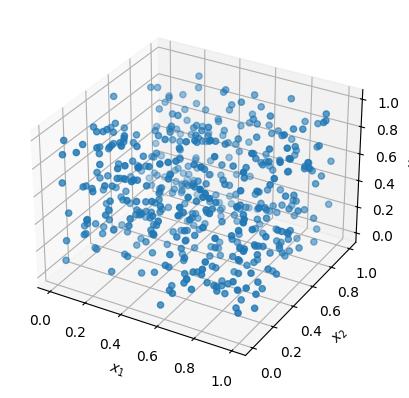

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

U = np.random.rand(n, 3)
ax.scatter(U[:, 0], U[:, 1], U[:, 2])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$x_3$")
euc_dist = euclidean_distances(U)
cos_dist = cosine_distances(U)
euc_dist_flatten = euc_dist[np.tril_indices(n, k = -1)]
cos_dist_flatten = cos_dist[np.tril_indices(n, k = -1)]
print(f"The average euclidean distance is: {np.mean(euc_dist_flatten):.4f}")
print(f"The average cosine distance is: {np.mean(cos_dist_flatten):.4f}")

Now let us take a look, how average distances behave for an increasing number of dimensions. The cell below exhibits the distance distributions for $d = 10, 100, 1000$. We observe that distributions are shifted to the right for pairwise euclidean distances which means they increase simply because we increase dimensionality. The cosine distances stay on average at the same level, but, become less diverse with increasing dimensionality. Does this mean that cosine similariy is not prone to the fallacies of the curse of dimensionality?

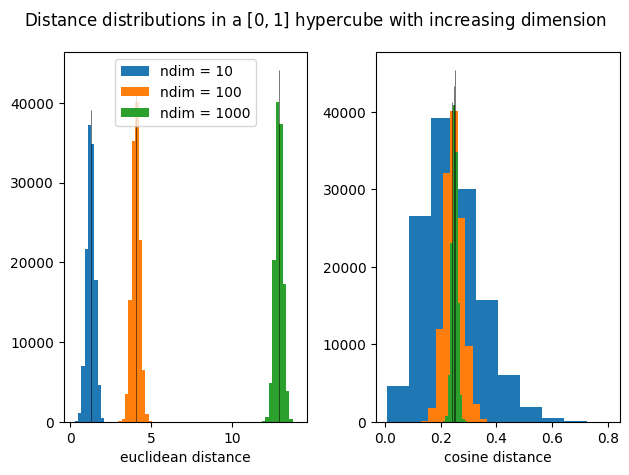

In [4]:
n = 500
n_dims = [10, 100, 1000]

fig, axs = plt.subplots(1, 2)

for i, n_dim in enumerate(n_dims):
    U = np.random.rand(n, n_dim)
    euc_dist = euclidean_distances(U)
    cos_dist = cosine_distances(U)
    euc_dist_flatten = euc_dist[np.tril_indices(n, k = -1)]
    cos_dist_flatten = cos_dist[np.tril_indices(n, k = -1)]

    axs[0].hist(euc_dist_flatten, label = f"ndim = {n_dim}", density = False)
    axs[0].vlines(np.mean(euc_dist_flatten), axs[0].get_ylim()[0], axs[0].get_ylim()[1], color = "k", linewidth = 0.5, alpha = 0.75)
    axs[0].set_xlabel("euclidean distance")
    axs[1].hist(cos_dist_flatten)
    axs[1].vlines(np.mean(cos_dist_flatten), axs[1].get_ylim()[0], axs[1].get_ylim()[1], color = "k", linewidth = 0.5, alpha = 0.75)
    axs[1].set_xlabel("cosine distance")

axs[0].legend()

fig.suptitle(rf"Distance distributions in a $[0, 1]$ hypercube with increasing dimension")
fig.tight_layout()

 Unfortunately not in general! Take a look a look at the cell below for which we now sample observations in $[-1, 1]^d$.

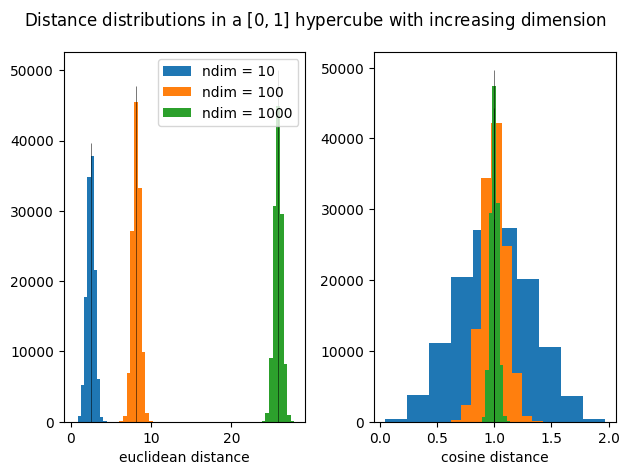

In [5]:
n = 500
n_dims = [10, 100, 1000]

fig, axs = plt.subplots(1, 2)

for i, n_dim in enumerate(n_dims):
    U = np.random.uniform(-1, 1, size = n * n_dim).reshape(n, n_dim)
    euc_dist = euclidean_distances(U)
    cos_dist = cosine_distances(U)
    euc_dist_flatten = euc_dist[np.tril_indices(n, k = -1)]
    cos_dist_flatten = cos_dist[np.tril_indices(n, k = -1)]

    axs[0].hist(euc_dist_flatten, label = f"ndim = {n_dim}", density = False)
    axs[0].vlines(np.mean(euc_dist_flatten), axs[0].get_ylim()[0], axs[0].get_ylim()[1], color = "k", linewidth = 0.5, alpha = 0.75)
    axs[0].set_xlabel("euclidean distance")
    axs[1].hist(cos_dist_flatten)
    axs[1].vlines(np.mean(cos_dist_flatten), axs[1].get_ylim()[0], axs[1].get_ylim()[1], color = "k", linewidth = 0.5, alpha = 0.75)
    axs[1].set_xlabel("cosine distance")

axs[0].legend()

fig.suptitle(rf"Distance distributions in a $[0, 1]$ hypercube with increasing dimension")
fig.tight_layout()

Remember that cosine distance is $ 1 - d_{cosine} (\boldsymbol{x}_i, \boldsymbol{x}_{k})$, this means that an average value of it being equal to $1$ implies average similarities of $0$. Thus, for higher dimension, vectors are independent of each other. Let us end the experiment here. What you should take away from it is that measuring similarities can become challenging if we use high dimensional vectors for the numerical representation of words and documents. Thus, sometimes we may need to bring high-dimensional representations back to lower dimensions by making use of dimensionality reduction techniques as principal component analysis (PCA), t-distributed neighbor embedding (t-sne) or unifold manifold approximation and projection (umap).

# Applications of word frequencies in finance

Text analysis in the financial area already has a long history with versatile applications. The first major contributions were based upon word frequencies and dictionary based approaches. When analyzing it is important to have some background knowledge in the financial domain. In this chapter, we take a look at some examples to get familiar with some domain specific characteristics. 

## Domain specific language matters

One of the most cited text analysis research articles is by [Loughran and McDonald (2011)](https://www.uts.edu.au/sites/default/files/ADG_Cons2015_Loughran%20McDonald%20JE%202011.pdf) which was mentioned in the last chapter. Their paper addresses issues with existing word classification methods used for analyzing the tone in financial texts, particularly 10-K reports. The research focuses on how the widely used Harvard Psychosociological Dictionary (H4N) misclassifies words when applied to financial contexts. Specifically, about 73.8% of the words deemed “negative” by the Harvard list, such as “tax,” “liability,” or “cost,” are not necessarily negative in financial contexts but rather commonly used terms in business.

The authors argue that such misclassification introduces noise into tone analysis and develop a new word list, “Fin-Neg,” tailored to the financial setting. The Fin-Neg list consists of words that genuinely have negative connotations in finance, such as “felony,” “litigation,” and “misstatement.” They find that using this list results in stronger correlations with financial variables like returns, trading volume, and volatility than the Harvard list. Their analysis also extends to additional word lists covering positive, uncertainty, and litigious tones, among others.

By examining over 50,000 10-K reports filed from 1994 to 2008, the paper demonstrates that Fin-Neg provides a more accurate reflection of negative sentiment and shows a stronger relation to stock price reactions and financial outcomes during the 10-K filing period.

Among different variables in their paper, they examine if a relationship between the number of negative words in a 10-K report and the corresponding stock market reaction around the filing date of the report exists. Let $s_{t, }$ be the stock price of a company, then $r_{t, i}$

$$
r_{t, i} = \frac{s_{t, i} - s_{t-1, i}}{s_{t-1, i}} = \frac{s_{t, i}}{s_{t-1, i}} - 1
$$

is the discrete return between two time periods $t, t-1$. Furthermore, $r_{t, b}$ represents the return at the same point in time of a reasonable benchmark, e.g., a broad stock market index. The excess return is given by the difference:

$$
\tilde{r}_{t, i} = r_{t, i} - r_{t, b}
$$

Stock market reactions are quantified by the excess return around the event date (the day the report is filed). This period is called event period or event window. For instance, a popular choice is a four day event window which determines the excess return between $t-1$ and $t+2$. The benchmark chosen in most of the studies (using data from the United States) is the value weighted buy-and-hold CRSP index. CRSP is a data provider that has a broad set of stock market data with long historical access, including listed and de-listed stocks. Thus, this is an index which captures the aggregate market development. Note, that this is an important and domain specific issue. Stock price changes on equity markets tend to co-move together, which leads to positive correlation between company returns and systematic market movements. For instance, market participants refer to bear and bull markets during times when the majority of all companies experiences an increase and decrease of its market value, respectively. Thus, to isolate the company development over an event window from systematic market movements, one can use the excess return as described above. Other ways can be chosen to control for systematic developments, e.g., the use of abnormal returns which describe the difference between the observed and the expected return. Hereby, the expected return is usually determined by a model which relates the company return to factors that are known to capture systematic stock market movements. 

In their paper Loughrain and McDonald (2011), use a regression analysis to examine if negative tone in 10-K filings has an impact on the stock market reaction (excess return).

$$
\tilde{r}_{t, i} = \beta_0 + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \beta_4 \log \text{turnover}_{t, i} + \beta_5 \text{FF}_{t, i} + \beta_6 \text{InstOwn}_{t, i} + \beta_7 \text{Nasdaq}_{t, i} + \epsilon_{t, i}
$$

The parameter which is of interest is $\beta_1$ because it measures the impact of the tone in the filing on the stock market reaction. In their analysis, tone is the number of negative words according to their domain specific dictionary divided by the number of words in a report. As an alternative, they also conduct the analysis with and a term-frequency inverse-document-frequency weighted count of negative words. Other variables are called control variables and must be included to measure the impact of tone more precisely. For instance, if a company is bigger, it is likely that more investors pay attention towards their reports and investors act quicker and more accurate to information shared in the report. The size is usually quantified by the natural log of the market capitalization. The book-to-market value (btm) is another control variable which is the ratio between the equity value according to the balance sheet of a company and its value according to the stock market (market capitalization). The (share) turnover is the relation of volume traded in the year before the filing to the number of outstanding shares of a company. A high value reflects many ownership changes. The variable FF stands for Fama-French alpha and refers to a popular model in finance. It measures if a company experienced surprisingly good and bad returns in the more recent history. The variable InstOwn stands for institutional ownership and describes the fraction of institutional owners of the company in the quarter before the filing. The higher it is, the more attention is paid to the company by professional investors which may also lead to more accurate or at least stronger stock market reactions in both possible directions. The Nasdaq variable is a dummy variable which is equal to one for companies which are listed at the Nasdaq exchange and zero otherwise.

Please note, that we can not go into econometric details, however, such regression analysis usually control for clustering in the data and potential omitted variables. Examples how to do this are the used of fixed effects regression and corrections of standard errors. Take a look at this [online book](https://www.tidy-finance.org/python/fixed-effects-and-clustered-standard-errors.html) for a more detailed explanation.

If we take a look at Table IV in the paper, we observe that the domain specific tone has a larger effect than if it is determined with a general purpose dictionary. This is an important result as it shows that text analysis can benefit from the usage of domain specific language models. At the same time, when looking at the coefficient of determination $R^2$ which in general is defined by:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

The low values in the analysis highlight, that only little variation of stock market reactions can be explained by tone and control variables. This demonstrates another more general challenge for financial text analysis, a high noise-to-signal ratio. This means that it is really difficult to quantify the importance of textual information precisely.

To understand this type of analysis a little better, we take a look at an own analysis. The data includes 1966 companies with annual 10-K reports between 2002 and 2024. Not every company exists over the whole period. On average we have almost ten reports over the time period. For every company we collect the market capitalization and book to market value at the filing date. The excess return is the four day event return over the market portfolio provided by [Kenneth French data site](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) between $t-1$ and $t+2$, where $t$ represents the filing date. For every report, we count the number of negative words according to the [Loughrain-McDonald dictionary](https://sraf.nd.edu/loughranmcdonald-master-dictionary/). and determine the relative frequency of negative words. The cell below exhibits descriptive statistics for 19125 firm year observations. While the average and median excess return is around zero it varies between $-0.98$ and $0.41$. Size is given by the log of market cap. Note that negative book to market values imply a negative equity value, meaning liabilities are larger than assets. However, as long as the company is not legally insolvent and can fulfill its obligations, it can continue its business operations. Negative word frequencies are between zero and $0.055$. The average report has a length of around 50,000 words. Note that each report is relatively simply preprocessed, i.e., removal of numbers and punctuation, lower casing and splitting into words by whitespaces. 

In [6]:
import pandas as pd

lmcd_regression_data = pd.read_parquet("../analysis/lmcd_regression_data.parquet")
lmcd_regression_data["freq_negative"] = lmcd_regression_data["negative"] / lmcd_regression_data["n_words"] 
lmcd_regression_data["Date"] = pd.to_datetime(lmcd_regression_data["Date"])
lmcd_regression_data["year_month"] = [str(dt.year) + "_" + str(dt.month) for dt in  lmcd_regression_data.Date]
lmcd_regression_data['neg_freq_quintile'] = pd.qcut(lmcd_regression_data['freq_negative'], 5, labels = [f"Q{i+1}" for i in range(5)])
lmcd_regression_data.get(["ex_r_t", "Size", "BTM", "freq_negative", "n_words"]).describe()

,ex_r_t,Size,BTM,freq_negative,n_words
count,19125.000000,19125.000000,19125.000000,19125.000000,19125.000000
mean,-0.000755,22.609088,0.471917,0.016800,51537.597490
std,0.048978,1.423160,0.601495,0.004740,26364.465927
min,-0.983018,16.232908,-7.332997,0.000000,347.000000
25%,-0.017244,21.555226,0.208206,0.013751,35661.000000
50%,0.000015,22.464324,0.377686,0.016640,48319.000000
75%,0.017682,23.551008,0.627358,0.019511,63123.000000
max,0.409557,28.776384,46.641317,0.055189,388143.000000


Figure 1 of the original paper shows a clear negative relationship between firms sorted into quintiles according to the negative word frequencies and excess returns. We do the same. If you are not familiar with such a procedure, we sort all observations (over time and companies) of negative word frequencies and split this data set into five equally sized parts. For every part, we determine the median of excess returns. This is what you can observe below. In comparison to the original paper, we still observe a negative relationship, however, it is less strict pronounced. 

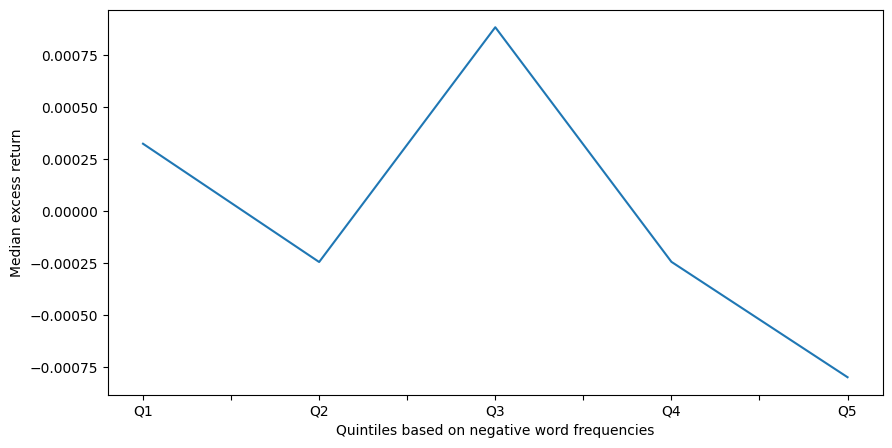

In [7]:
neg_quintiles_fig = lmcd_regression_data.loc[:, ["ex_r_t", 'neg_freq_quintile']].groupby("neg_freq_quintile", observed = True).median().plot(figsize = (10, 5), xlabel = "Quintiles based on negative word frequencies", ylabel = "Median excess return", legend = False)

Last, we conduct three regression analysis:

$$
\tilde{r}_{t, i} = \beta_0 + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
\tilde{r}_{t, i} = \beta_i + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
\tilde{r}_{t, i} = \beta_i + \beta_t + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
$$

The first model is a benchmark, which does not include any fixed effects, the second includes firm fixed effects ($\beta_i$) and the last model includes firm and time fixed effects ($\beta_i, \beta_t$) controlling for the averages of excess returns by firm and by time. The time is defined by year-month which means the average of all excess returns for a specific month in a specific year is taken into account when estimating the impact of negative word frequencies ($\text{tone}$). Furthermore, standard errors are corrected for potential cluster of firms and years.

The results are shown in the cell below. The estimated $\beta$ coefficients are reported with t-statistics (in brackets). We do not find a significant impact of the tone on excess returns. Without firm or time fixed effects almost no variation in excess returns can be explained. When controlling for firm and time effects, the sign of tone switches from positive to negative which is the opposite of the original finding. Overall, we do not find any evidence that stock market participants react to negative tone measured by the Loughrain and McDonald dictionary anymore.

In [8]:
import pyfixest as pf


model_ols = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

model_fe_firm = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM | RIC",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

model_fe_firmyear = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM | RIC + year_month",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

pf.etable([model_ols, model_fe_firm, model_fe_firmyear], coef_fmt = "b (t)")

GT(_tbl_data=  level_0        level_1                   0                   1  \
0    coef  freq_negative     -0.003 (-0.038)     -0.006 (-0.051)   
1    coef           Size      0.001* (2.122)     0.003** (2.692)   
2    coef            BTM     -0.005 (-1.743)     -0.004 (-1.232)   
3    coef      Intercept     -0.016 (-1.858)                       
4      fe     year_month                   -                   -   
5      fe            RIC                   -                   x   
6   stats   Observations               19125               19125   
7   stats      S.E. type  by: RIC+year_month  by: RIC+year_month   
8   stats  R<sup>2</sup>               0.004               0.147   

                    2  
0       0.150 (1.244)  
1     0.004** (3.069)  
2     -0.004 (-1.099)  
3                      
4                   x  
5                   x  
6               19125  
7  by: RIC+year_month  
8               0.169  , _body=<great_tables._gt_data.Body object at 0x3737e8f50>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x3737ea510>, _spanners=Spanners([SpannerInfo(spanner_id='ex_r_t', spanner_level=1, spanner_label='ex_r_t', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient (t-stats)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x3737e8f20>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', ty

## Predicting market reactions with machine learning models

The observations from above do not necessarily mean that stock market relations are not related to textual disclosure of companies. A more recent publication by [Frankel et al.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3845780) compares the effectiveness of machine learning methods and dictionary-based methods for measuring sentiment in corporate disclosures, specifically focusing on 10-K filings and conference calls.

The study demonstrates that machine learning methods significantly outperform dictionary-based methods (such as the Loughran and McDonald (LM) dictionary and Harvard Psychosociological dictionary) in capturing sentiment reflected in stock returns, particularly at the time of 10-K filings and conference calls. Machine learning techniques provide greater explanatory power for stock price movements, especially at conference call dates, where their effectiveness surpasses that of dictionary methods more substantially than in 10-K filings.

The paper replicates and extends the results of Loughran and McDonald (2011) and finds that the LM dictionary works well for their original sample period (1996–2008) but loses explanatory power in more recent years (1996–2019). Conversely, machine learning methods perform consistently across time. Among the machine learning algorithms evaluated (including random forest regression trees, support vector regression (SVR), and supervised Latent Dirichlet Allocation (sLDA)), random forest was found to capture sentiment better than the other techniques. 

The machine learning models, particularly random forest, not only capture immediate investor sentiment but also predict future earnings surprises and hedge portfolio returns more accurately than dictionary-based methods. These models capture information that investors may initially overlook but is later reflected in stock prices.

Conference calls, being more dynamic and immediate, demonstrate stronger reactions to sentiment captured by machine learning models compared to 10-K filings. This suggests that machine learning is especially effective in settings with real-time interactive content, as opposed to more static documents like 10-K filings. The paper concludes that machine learning techniques, especially random forest methods, provide a superior and more reliable approach to measuring sentiment in financial disclosures than traditional dictionary-based methods. It recommends that researchers adopt machine learning approaches for analyzing textual sentiment in financial contexts to reduce errors and improve predictions of market responses and future performance indicators.

To predict financial sentiment, they first transform financial documents (10-K filings and earning call transcripts) into document term matrices of word counts (after removing stop words and stemming). Thus, each term count is treated as a common feature by a machine learning algorithm. The target variable is given by the three day cumulative abnormal return around the date of the document's disclosure. For a given year, the model is trained using all observations from that year. This model is used to predict cumulative abnormal returns for the next year. Formally, let $f$ be a functional relationship which is supposed to be captured by a machine learning algorithm, $D_t$ the document term matrix and $\mathbf{r}_t$ be the vector of cumulative abnormal returns for year $t$. The model creates predictions $\hat{\mathbf{r}}_t$ by:

$$
f\left(D_t\right) = \hat{\mathbf{r}}_t
$$

The model is trained by minimizing a loss function $L$ which is lower if $\hat{\mathbf{r}}_t$ are close to $\mathbf{r}_t$. Finally, each prediction is treated as an approximation of the sentiment from that report. The idea is that market reactions are related to the content of the financial document. While such a measure may be exposed to noise (as other factor besides the document can impact the market return), the variation of actual cumulative returns observed can be explained in a more precise way than for the method of Loughran and MacDonald.

The algorithm which works best in their analysis is a random forest. A random forest creates predictions by averaging predictions of decision trees which are trained on subsamples of a data set. A decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together. A partition is called a node and the split points or rules to partition the nodes further are called edges. At some point the algorithm stops and we end up with the final nodes which are called leaves and can be used to predict the label. At each step, data is split such that a quality criterion is optimized, which is the lower the more pure the resulting partitions are with respect to a target variable. A more formal definition can be found [here](https://scikit-learn.org/1.5/modules/tree.html#mathematical-formulation). 

See below an example for a decision tree which is stopped at a tree depth level of two.


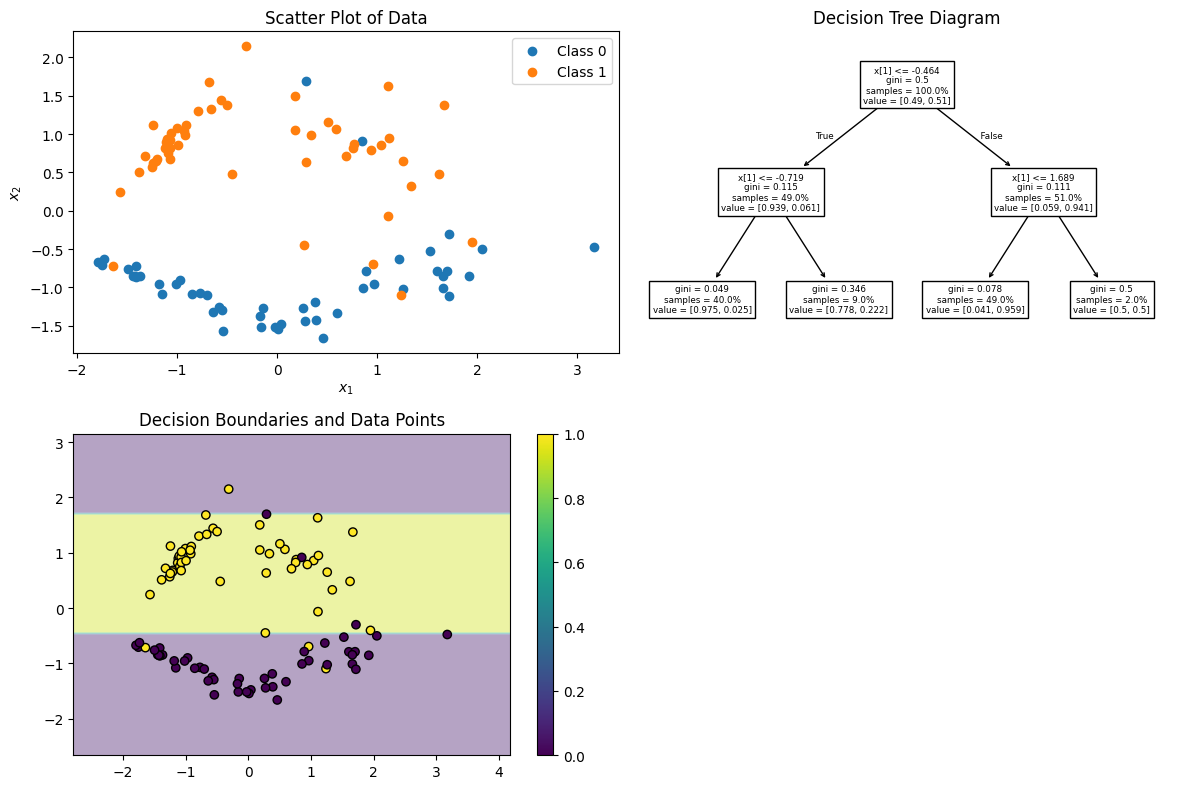

In [9]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Generate data
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, flip_y=0.10, random_state=1)

# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1st Plot: Scatter plot of the original data
axes[0, 0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
axes[0, 0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
axes[0, 0].set_xlabel(r"$x_1$")
axes[0, 0].set_ylabel(r"$x_2$")
axes[0, 0].set_title('Scatter Plot of Data')
axes[0, 0].legend()

# Fit the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X, y)

# 2nd Plot: Decision tree diagram
tree.plot_tree(classifier, proportion=True, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Diagram')

# Create a mesh grid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict values for each point on the grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3rd Plot: Decision boundaries with data points
contour = axes[1, 0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = axes[1, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[1, 0].set_title('Decision Boundaries and Data Points')
plt.colorbar(scatter, ax=axes[1, 0])

# Leave the 4th subplot (axes[1, 1]) empty
axes[1, 1].axis('off')  # This line turns off the axis, making it a blank subplot

# Adjust layout for clarity
plt.tight_layout()
plt.show()

And in analogy, a regression tree.

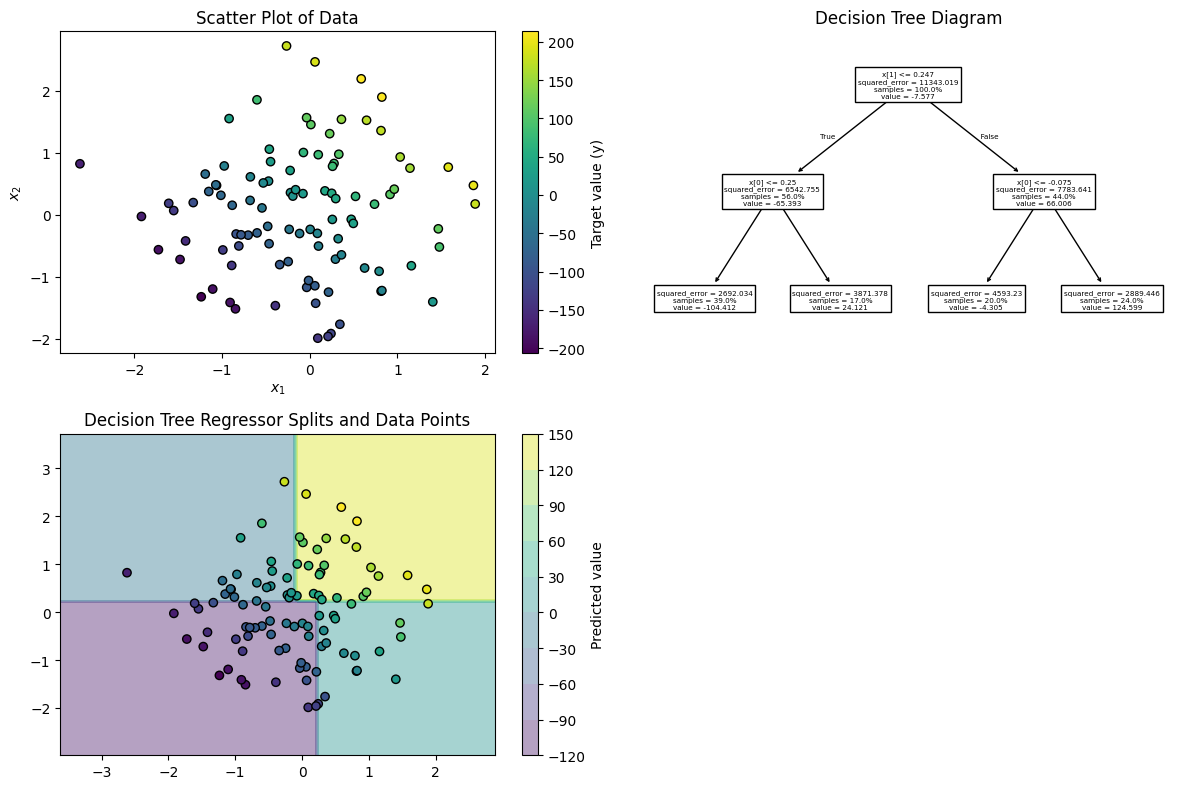

In [10]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Generate data
X, y = make_regression(n_features=2, n_informative=2, noise=1., random_state=42)

# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1st Plot: Scatter plot of the original data with color shading based on target value (y)
scatter = axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[0, 0].set_xlabel(r"$x_1$")
axes[0, 0].set_ylabel(r"$x_2$")
axes[0, 0].set_title('Scatter Plot of Data')
plt.colorbar(scatter, ax=axes[0, 0], label='Target value (y)')

# Fit the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, y)

# 2nd Plot: Decision tree diagram
tree.plot_tree(regressor, proportion=True, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Diagram')

# Create a mesh grid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict values for each point on the grid
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3rd Plot: Decision boundaries with data points
contour = axes[1, 0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
axes[1, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[1, 0].set_title('Decision Tree Regressor Splits and Data Points')
plt.colorbar(contour, ax=axes[1, 0], label='Predicted value')

# Leave the 4th subplot (axes[1, 1]) empty
axes[1, 1].axis('off')  # This line turns off the axis, making it a blank subplot

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Trees are very flexible, however, prone to overfitting. This may be overcome by proper hyperparameter settings, however, still can come along with high variations of predictions from tree based models. Thus, so called decision and random forests evolved which generate their predictions by averaging predictions from multiple trees. Each tree is estimated on a sample from the original data which usually only uses a subset of all available features. 

For the paper by Frankel et al., random forests work best to predict the financial sentiment of 10-K filings and earning call transcripts. 